# 序列模型
## 训练

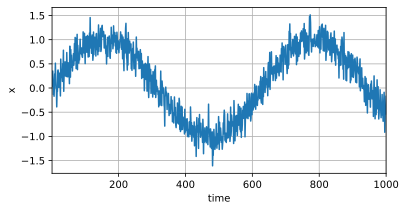

In [2]:
%matplotlib inline
import torch
from torch import nn 
import sys
sys.path.append("../")
import mytorch

T = 1000 # 总共产生 1000 个点
time = torch.arange(1, T+1, dtype= torch.float32)
x = torch.sin(0.01*time) + torch.normal(0, 0.2, (T,))
mytorch.plot(time,[x],'time','x',xlim=[1, 1000], figsize=(6, 3))

In [ ]:
tau = 4
features = torch.zeros((T-tau, tau))
for i in range(tau):
    features[:,i] = x[i:T-tau+i]
labels = x[tau:].reshape((-1,1))

batch_size, n_train = 16, 600
# 只有前n_train个样本用于训练
train_iter = mytorch.load_array((features[:n_train],labels[:n_train]), batch_size, is_train=True)

# 初始化网络权重的函数
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

# 一个简单的多层感知机
def get_net():
    net = nn.Sequential(nn.Linear(4, 10), nn.ReLU(),
                        nn.Linear(10, 1))
    net.apply(init_weights)
    return net

# 平方损失。注意：MSELoss计算平方误差时不带系数1/2
loss = nn.MSELoss(reduction="none")

def train(net, train_iter, loss, epochs, lr):
    trainer = torch.optim.Adam(net.parameters(),lr)
    for epoch in range(epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            